In [1]:
!pip install validclust
from validclust import dunn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.metrics.cluster import rand_score
from yellowbrick.cluster import KElbowVisualizer
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("World Indicators.csv")
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving World Indicators.csv to World Indicators.csv


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


## Analysis 1

In [2]:
#Analysis 1 based on Infant Mortality Rate VS Mobile Phone Usage
wi_health = df[['Infant Mortality Rate','Mobile Phone Usage', 'Country']]
wi_health_cleaned = wi_health.dropna()
wi_health_cleaned

,Infant Mortality Rate,Mobile Phone Usage,Country
0,0.023,0.9,Algeria
1,0.107,0.5,Angola
2,0.060,0.8,Benin
3,0.039,1.5,Botswana
4,0.068,0.5,Burkina Faso
...,...,...,...
201,0.022,1.0,Suriname
202,0.020,1.4,Trinidad and Tobago
204,0.006,0.9,United States
205,0.010,1.4,Uruguay



2.1A KMEANS CLUSTERING OF DATA 1 



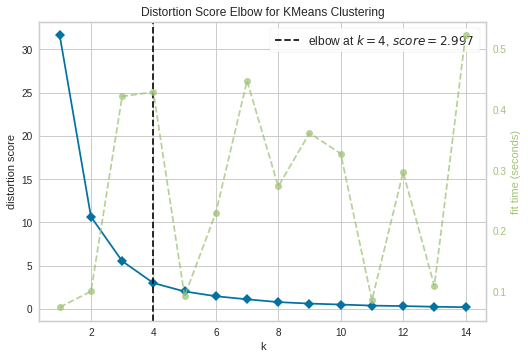

No of clusters using KMeans Algorithm 4 

[2 1 2 0 1 1 1 1 1 1 1 2 2 1 3 2 1 1 0 2 2 1 1 2 2 1 0 1 1 2 2 3 3 1 3 1 2
 1 2 2 0 1 1 3 1 2 2 2 1 3 1 2 2 2 3 3 2 2 3 2 2 3 2 3 3 0 1 3 3 2 3 0 3 1
 1 2 3 0 2 2 3 2 3 2 0 3 2 0 3 3 2 0 3 3 3 3 0 0 2 3 3 3 3 3 0 3 0 0 3 3 2
 2 0 3 3 3 3 3 0 3 3 3 3 3 3 3 2 3 3 3 2 2 3 3 0 2 0 3 0 2 3 1 3 2 1 1 3 1
 1 1 2 0 0 2 3 2 2 3 2 3 3 2 1 0 2 3 3 3 3 2 1 3 3 2 2 0 3 3 0 3 3 3 0 2 0
 3]

2.1B HIERARCHICAL CLUSTERING OF DATA 1

No of clusters using Hierarchical algorithm = 2 

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0]


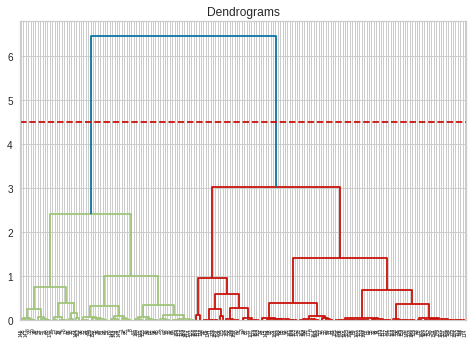

In [3]:
# TASK 1.1 Use K-means and hierarchical clustering methods to generate cluster

print("\n2.1A KMEANS CLUSTERING OF DATA 1 \n")
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k =(1,15)).fit(wi_health_cleaned.iloc[:,0:2])
visualizer.show()
print('No of clusters using KMeans Algorithm', visualizer.elbow_value_,'\n')
k_means_optimum1 = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
No_of_clusters_KMeans1 = k_means_optimum1.fit_predict(wi_health_cleaned.iloc[:,0:2])
print(No_of_clusters_KMeans1)

#Task 1.1B hierarchical clustering methods to generate cluster

print("\n2.1B HIERARCHICAL CLUSTERING OF DATA 1\n")
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wi_health_cleaned.iloc[:,0:2], method='ward'))
plt.axhline(y=4.5, color='r', linestyle='--')
print('No of clusters using Hierarchical algorithm = 2 \n')
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
No_of_clusters_Hier1 = cluster1.fit_predict(wi_health_cleaned.iloc[:,0:2])
print(No_of_clusters_Hier1)

In [ ]:
# Task 2.2 Evaluate the performance of the clustering algorithm using internal validation metrics
print('\n 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING \n')
dist_cohesiveKM = pairwise_distances(wi_health_cleaned.iloc[:,0:2])
dunn_cohesiveKM = dunn(dist_cohesiveKM,No_of_clusters_KMeans1)
print('DUNN INDEX ', dunn_cohesiveKM)
print('SILHOUETTE SCORE', silhouette_score(wi_health_cleaned.iloc[:,0:2], k_means_optimum1.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_health_cleaned.iloc[:,0:2], k_means_optimum1.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_health_cleaned.iloc[:,0:2],No_of_clusters_KMeans1))
print('\n 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING\n')
dist_cohesiveHC = pairwise_distances(wi_health_cleaned.iloc[:,0:2])
dunn_cohesiveHC = dunn(dist_cohesiveHC,No_of_clusters_Hier1)
print('DUNN INDEX ', dunn_cohesiveHC)
print('SILHOUETTE SCORE', silhouette_score(wi_health_cleaned.iloc[:,0:2], cluster1.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_health_cleaned.iloc[:,0:2], cluster1.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_health_cleaned.iloc[:,0:2],No_of_clusters_Hier1))


 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING 

DUNN INDEX  0.1666333433299994
SILHOUETTE SCORE 0.568705990477746
DAVIS BOULDIN SCORE 0.5168145798014854
CALINSKI HARABASZ SCORE 579.3855587247043

 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING

DUNN INDEX  0.09074092606589065
SILHOUETTE SCORE 0.5800435481038493
DAVIS BOULDIN SCORE 0.5637086106805298
CALINSKI HARABASZ SCORE 361.5967748794465


**Task 2.3** Report the best clustering solution.

From the performance metrics of both KMeans method and Hierarchial method of clustering, we have obtained a higher Silhouette score from the latter.


*   SILHOUETTE SCORE (Kmeans): 0.568705990477746
*   SILHOUETTE SCORE (hiearchial): 0.5800435481038493


A higher silhouette score signifies better cohesion in the clusters and better seperation among the clusters.
Therefore, we conclude that the best clustering method is that of Hierarchial. 

In [ ]:
# Task 2.3 
wi_health_KMclustered = wi_health_cleaned.copy()
wi_health_KMclustered['Cluster'] = No_of_clusters_KMeans1
print('GROUPING BASED ON KMEANS \n')
print('COUNTRIES IN CLUSTER 1:\n',wi_health_KMclustered[wi_health_KMclustered.Cluster==0]['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_health_KMclustered[wi_health_KMclustered.Cluster==1]['Country'])
print('\nCOUNTRIES IN CLUSTER 3:\n',wi_health_KMclustered[wi_health_KMclustered.Cluster==2]['Country'])
print('\nCOUNTRIES IN CLUSTER 4:\n',wi_health_KMclustered[wi_health_KMclustered.Cluster==3]['Country'])

GROUPING BASED ON KMEANS 

COUNTRIES IN CLUSTER 1:
 3                 Botswana
18                   Gabon
26                   Libya
40              Seychelles
66              Kazakhstan
73                Maldives
79               Singapore
86                 Vietnam
89                 Austria
93                Bulgaria
98                 Estonia
100                Finland
108                  Italy
112              Lithuania
113             Luxembourg
118             Montenegro
124     Russian Federation
140                 Kuwait
142                   Oman
144           Saudi Arabia
163    Antigua and Barbuda
164              Argentina
179               Dominica
192                 Panama
197    St. Kitts and Nevis
202    Trinidad and Tobago
205                Uruguay
Name: Country, dtype: object

COUNTRIES IN CLUSTER 2:
 1                        Angola
4                  Burkina Faso
5                       Burundi
6                      Cameroon
7      Central African Republic
8   

In [ ]:
wi_health_HCclustered =  wi_health_cleaned.copy()
wi_health_HCclustered['Cluster'] = No_of_clusters_Hier1
wi_health_HCcluster1 = wi_health_HCclustered[wi_health_HCclustered.Cluster==0]
wi_health_HCcluster2 = wi_health_HCclustered[wi_health_HCclustered.Cluster==1]
print('GROUPING BASED ON HIERARCHICAL \n')
print('COUNTRIES IN CLUSTER 1:\n',wi_health_HCcluster1['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_health_HCcluster2['Country'])

GROUPING BASED ON HIERARCHICAL 

COUNTRIES IN CLUSTER 1:
 0                  Algeria
3                 Botswana
11             Congo, Rep.
12           Cote d'Ivoire
14        Egypt, Arab Rep.
              ...         
201               Suriname
202    Trinidad and Tobago
204          United States
205                Uruguay
206          Venezuela, RB
Name: Country, Length: 113, dtype: object

COUNTRIES IN CLUSTER 2:
 1            Angola
2             Benin
4      Burkina Faso
5           Burundi
6          Cameroon
           ...     
177            Cuba
186          Guyana
187           Haiti
190          Mexico
191       Nicaragua
Name: Country, Length: 73, dtype: object



 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF INFANT MORTALITY RATE AND MOBILE USAGE



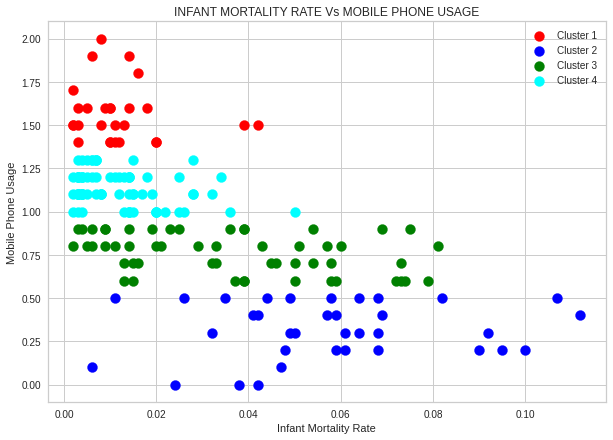


 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE USAGE 1



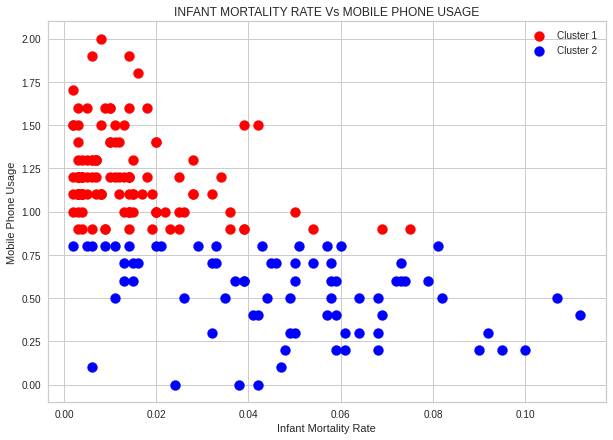

In [ ]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF INFANT MORTALITY RATE AND MOBILE USAGE\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.Cluster == 0]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.Cluster == 0]['Mobile Phone Usage'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.Cluster == 1]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.Cluster == 1]['Mobile Phone Usage'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.Cluster == 2]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.Cluster == 2]['Mobile Phone Usage'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(wi_health_KMclustered[wi_health_KMclustered.Cluster == 3]['Infant Mortality Rate'], wi_health_KMclustered[wi_health_KMclustered.Cluster == 3]['Mobile Phone Usage'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('INFANT MORTALITY RATE Vs MOBILE PHONE USAGE')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Mobile Phone Usage')
plt.legend()
plt.show()

print("\n 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE USAGE 1\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.Cluster == 0]['Infant Mortality Rate'], wi_health_HCclustered[wi_health_HCclustered.Cluster == 0]['Mobile Phone Usage'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_health_HCclustered[wi_health_HCclustered.Cluster == 1]['Infant Mortality Rate'], wi_health_HCclustered[wi_health_HCclustered.Cluster == 1]['Mobile Phone Usage'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('INFANT MORTALITY RATE Vs MOBILE PHONE USAGE')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Mobile Phone Usage')
plt.legend()
plt.show()

## Analysis 2

In [ ]:
#Analysis 2 based on Internet Usage VS Population Urban
wi_internet = df[['Internet Usage','Population Urban', 'Country']]
wi_internet_cleaned = wi_internet.dropna()
wi_internet_cleaned

,Internet Usage,Population Urban,Country
0,0.1,0.682,Algeria
1,0.1,0.409,Angola
2,0.0,0.423,Benin
3,0.1,0.565,Botswana
4,0.0,0.265,Burkina Faso
...,...,...,...
202,0.6,0.089,Trinidad and Tobago
204,0.7,0.809,United States
205,0.5,0.946,Uruguay
206,0.4,0.888,"Venezuela, RB"



2.1A KMEANS CLUSTERING OF INTERNET USAGE Vs POPULATION URBAN



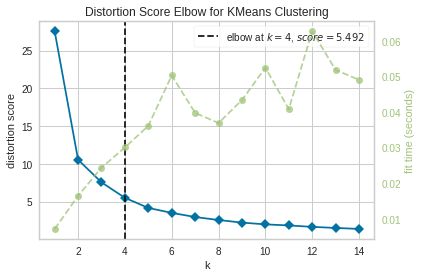

No of clusters using KMeans Algorithm 4 

[3 1 1 1 1 1 1 1 1 1 1 3 1 3 2 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 2 2 1 1 1 1
 1 3 1 2 1 1 3 1 1 1 1 3 1 1 1 1 3 2 1 1 0 1 2 3 0 1 1 0 2 0 1 1 0 0 1 3 1
 1 1 1 0 1 1 1 1 1 1 2 2 0 0 3 0 2 3 2 2 0 0 0 2 0 0 0 3 0 0 2 3 0 2 2 0 2
 0 2 0 3 0 0 2 2 2 3 0 3 2 2 0 0 0 3 3 0 0 3 3 0 3 0 0 3 0 3 3 0 1 0 3 2 0
 1 3 1 3 0 1 1 1 1 1 2 0 2 0 2 1 0 3 0 0 0 0 3 3 3 3 3 3 3 0 1 1 1 1 1 2 3
 1 3 3 3 0 2 2 2 3 2 0 0 3 3]

2.1B HIERARCHICAL CLUSTERING OF INTERNET USAGE Vs POPULATION URBAN

No of clusters using Hierarchical algorithm = 2 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


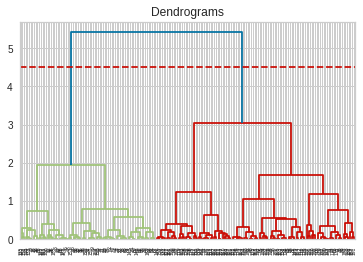

In [ ]:
# TASK 1.1 Use K-means and hierarchical clustering methods to generate cluster

print("\n2.1A KMEANS CLUSTERING OF INTERNET USAGE Vs POPULATION URBAN\n")
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k =(1,15)).fit(wi_internet_cleaned.iloc[:,0:2])
visualizer.show()
print('No of clusters using KMeans Algorithm', visualizer.elbow_value_,'\n')
k_means_optimum2 = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
No_of_clusters_KMeans2 = k_means_optimum2.fit_predict(wi_internet_cleaned.iloc[:,0:2])
print(No_of_clusters_KMeans2)

#Task 1.1B hierarchical clustering methods to generate cluster

print("\n2.1B HIERARCHICAL CLUSTERING OF INTERNET USAGE Vs POPULATION URBAN\n")
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wi_internet_cleaned.iloc[:,0:2], method='ward'))
plt.axhline(y=4.5, color='r', linestyle='--')
print('No of clusters using Hierarchical algorithm = 2 \n')
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
No_of_clusters_Hier2 = cluster2.fit_predict(wi_internet_cleaned.iloc[:,0:2])
print(No_of_clusters_Hier2)

In [ ]:
# Task 2.2 Evaluate the performance of the clustering algorithm using internal validation metrics
print('\n 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING \n')
dist_cohesiveKM = pairwise_distances(wi_internet_cleaned.iloc[:,0:2])
dunn_cohesiveKM = dunn(dist_cohesiveKM,No_of_clusters_KMeans2)
print('DUNN INDEX ', dunn_cohesiveKM)
print('SILHOUETTE SCORE', silhouette_score(wi_internet_cleaned.iloc[:,0:2], k_means_optimum2.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_internet_cleaned.iloc[:,0:2], k_means_optimum2.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_internet_cleaned.iloc[:,0:2],No_of_clusters_KMeans2))
print('\n 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING\n')
dist_cohesiveHC = pairwise_distances(wi_internet_cleaned.iloc[:,0:2])
dunn_cohesiveHC = dunn(dist_cohesiveHC,No_of_clusters_Hier2)
print('DUNN INDEX ', dunn_cohesiveHC)
print('SILHOUETTE SCORE', silhouette_score(wi_internet_cleaned.iloc[:,0:2], cluster2.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_internet_cleaned.iloc[:,0:2], cluster2.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_internet_cleaned.iloc[:,0:2],No_of_clusters_Hier2))


 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING 

DUNN INDEX  0.020381884661893744
SILHOUETTE SCORE 0.43248509017813497
DAVIS BOULDIN SCORE 0.8577903121107349
CALINSKI HARABASZ SCORE 261.3041558567644

 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING

DUNN INDEX  0.10277345741834987
SILHOUETTE SCORE 0.44086928509299844
DAVIS BOULDIN SCORE 0.784453191859303
CALINSKI HARABASZ SCORE 224.52236572793038


**Task 2.3** Report the best clustering solution.

From the performance metrics of both KMeans method and Hierarchial method of clustering, we have obtained a higher Silhouette score from the latter.

*   SILHOUETTE SCORE (Kmeans): 0.43248509017813497

*   SILHOUETTE SCORE (hierarchial): 0.44086928509299844


A higher silhouette score signifies better cohesion in the clusters and better seperation among the clusters. Therefore, we conclude that the best clustering method is that of Hierarchial.

In [ ]:
#Task 2.3 Give a detailed list of all the groups and the countries included within the groups
wi_internet_KMclustered = wi_internet_cleaned.copy()
wi_internet_KMclustered['Cluster'] = No_of_clusters_KMeans2
print('GROUPING BASED ON KMEANS \n')
print('\nCOUNTRIES IN CLUSTER 1:\n',wi_internet_KMclustered[wi_internet_KMclustered.Cluster==0]['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_internet_KMclustered[wi_internet_KMclustered.Cluster==1]['Country'])
print('\nCOUNTRIES IN CLUSTER 3:\n',wi_internet_KMclustered[wi_internet_KMclustered.Cluster==2]['Country'])
print('\nCOUNTRIES IN CLUSTER 4:\n',wi_internet_KMclustered[wi_internet_KMclustered.Cluster==3]['Country'])

GROUPING BASED ON KMEANS 


COUNTRIES IN CLUSTER 1:
 58        Brunei Darussalam
62     Hong Kong SAR, China
65                    Japan
68              Korea, Rep.
71         Macao SAR, China
72                 Malaysia
79                Singapore
88                  Andorra
89                  Austria
91                  Belgium
96           Czech Republic
97                  Denmark
98                  Estonia
100                 Finland
101                  France
102                 Germany
104                 Hungary
105                 Iceland
110                  Latvia
113              Luxembourg
115                   Malta
117                  Monaco
119             Netherlands
120                  Norway
125              San Marino
129                   Spain
130                  Sweden
131             Switzerland
134          United Kingdom
135                 Bahrain
138                  Israel
140                  Kuwait
141                 Lebanon
143                   Q

In [ ]:
wi_internet_HCclustered =  wi_internet_cleaned.copy()
wi_internet_HCclustered['Cluster'] = No_of_clusters_Hier2
print('GROUPING BASED ON HIERARCHICAL \n')
print('COUNTRIES IN CLUSTER 1:\n',wi_internet_HCclustered[wi_internet_HCclustered.Cluster==0]['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_internet_HCclustered[wi_internet_HCclustered.Cluster==1]['Country'])

GROUPING BASED ON HIERARCHICAL 

COUNTRIES IN CLUSTER 1:
 14          Egypt, Arab Rep.
23                     Kenya
31                 Mauritius
32                   Morocco
36                   Nigeria
               ...          
202      Trinidad and Tobago
204            United States
205                  Uruguay
206            Venezuela, RB
207    Virgin Islands (U.S.)
Name: Country, Length: 118, dtype: object

COUNTRIES IN CLUSTER 2:
 0           Algeria
1            Angola
2             Benin
3          Botswana
4      Burkina Faso
           ...     
185       Guatemala
187           Haiti
188        Honduras
191       Nicaragua
193        Paraguay
Name: Country, Length: 81, dtype: object



 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF INTERNET USAGE Vs POPULATION URBAN



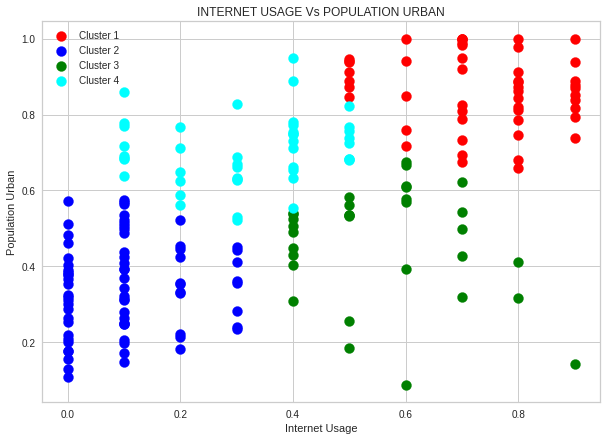


 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE



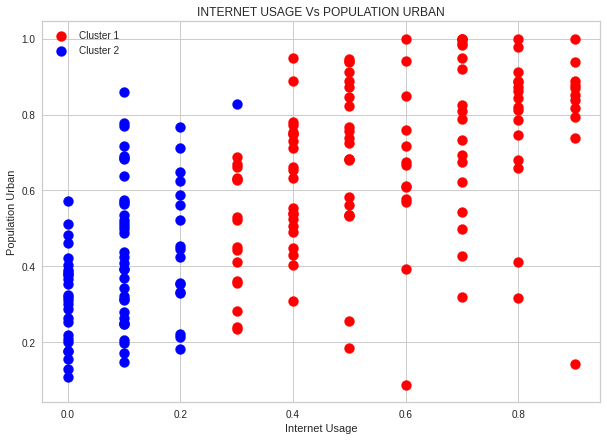

In [ ]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF INTERNET USAGE Vs POPULATION URBAN\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 0]['Internet Usage'], wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 0]['Population Urban'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 1]['Internet Usage'], wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 1]['Population Urban'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 2]['Internet Usage'], wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 2]['Population Urban'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 3]['Internet Usage'], wi_internet_KMclustered[wi_internet_KMclustered.Cluster == 3]['Population Urban'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('INTERNET USAGE Vs POPULATION URBAN')
plt.xlabel('Internet Usage')
plt.ylabel('Population Urban')
plt.legend()
plt.show()

print("\n 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF INFANT MORTALITY RATE AND MOBILE PHONE USAGE\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_internet_HCclustered[wi_internet_HCclustered.Cluster == 0]['Internet Usage'], wi_internet_HCclustered[wi_internet_HCclustered.Cluster == 0]['Population Urban'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_internet_HCclustered[wi_internet_HCclustered.Cluster == 1]['Internet Usage'], wi_internet_HCclustered[wi_internet_HCclustered.Cluster == 1]['Population Urban'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('INTERNET USAGE Vs POPULATION URBAN')
plt.xlabel('Internet Usage')
plt.ylabel('Population Urban')
plt.legend()
plt.show()

## Analysis 3

In [ ]:
#Analysis 3 based on Days to Start Business VS Lending Interest
wi_business = df[['Days to Start Business','Lending Interest', 'Country']]
wi_business.dropna(inplace = True)
wi_business

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Days to Start Business,Lending Interest,Country
0,25.0,0.080,Algeria
1,66.0,0.188,Angola
3,60.0,0.110,Botswana
5,13.0,0.132,Burundi
9,22.0,0.105,Comoros
...,...,...,...
201,694.0,0.118,Suriname
202,41.0,0.080,Trinidad and Tobago
204,5.0,0.033,United States
205,7.0,0.098,Uruguay


In [ ]:
# Standardizing column 'Days to Start Business' to prevent variables with larger scales from dominating how clusters are defined.
wi_business_to_standardize = wi_business[['Days to Start Business','Lending Interest']]
scaler = StandardScaler().fit(wi_business_to_standardize)
wi_business_standardized = wi_business[['Days to Start Business','Lending Interest']].copy()
standardized_columns = scaler.transform(wi_business_to_standardize)
wi_business_standardized['Days to Start Business'] = standardized_columns
wi_business_standardized['Country'] = wi_business['Country']
#Removing outlier to make the clustering more reliable.
wi_business_standardized.drop([201], inplace = True)
wi_business_standardized

,Days to Start Business,Lending Interest,Country
0,-0.087156,0.080,Algeria
1,0.554222,0.188,Angola
3,0.460362,0.110,Botswana
5,-0.274876,0.132,Burundi
9,-0.134086,0.105,Comoros
...,...,...,...
200,-0.321806,0.091,St. Vincent and the Grenadines
202,0.163138,0.080,Trinidad and Tobago
204,-0.400023,0.033,United States
205,-0.368736,0.098,Uruguay



2.1A KMEANS CLUSTERING OF DATA 3 



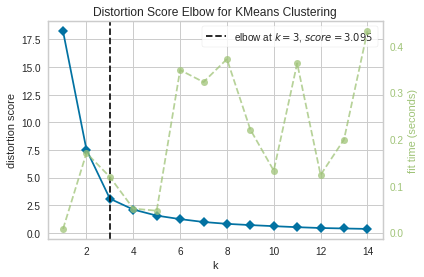

No of clusters using KMeans Algorithm 3 

[0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 2 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 1 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 2 0 0 0 1 0 0 0 1 0 2
 0 0 0 1 0 1 0 0 0 0 1 0 0 2]

2.1B HIERARCHICAL CLUSTERING OF DATA 3

No of clusters using Hierarchical algorithm = 3 

[0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 2 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 2 0 0 0 1 0 0 0 1 0 2
 0 0 0 1 0 1 0 0 0 0 1 0 0 2]


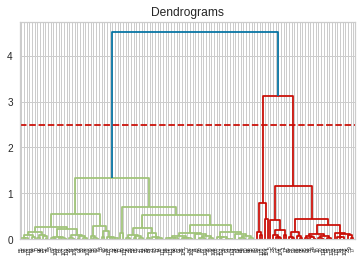

In [ ]:
# TASK 1.1 Use K-means and hierarchical clustering methods to generate cluster

print("\n2.1A KMEANS CLUSTERING OF DATA 3 \n")
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k =(1,15)).fit(wi_business_standardized.iloc[:,0:2])
visualizer.show()
print('No of clusters using KMeans Algorithm', visualizer.elbow_value_,'\n')
k_means_optimum3 = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
No_of_clusters_KMeans3 = k_means_optimum3.fit_predict(wi_business_standardized.iloc[:,0:2])
print(No_of_clusters_KMeans3)

#Task 1.1B hierarchical clustering methods to generate cluster

print("\n2.1B HIERARCHICAL CLUSTERING OF DATA 3\n")
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wi_business_standardized.iloc[:,0:2], method='ward'))
plt.axhline(y=2.5, color='r', linestyle='--')
print('No of clusters using Hierarchical algorithm = 3 \n')
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
No_of_clusters_Hier3 = cluster3.fit_predict(wi_business_standardized.iloc[:,0:2])
print(No_of_clusters_Hier3)

In [ ]:
# Task 2.2 Evaluate the performance of the clustering algorithm using internal validation metrics
print('\n 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING \n')
dist_cohesiveKM3 = pairwise_distances(wi_business_standardized.iloc[:,0:2])
dunn_cohesiveKM3 = dunn(dist_cohesiveKM3,No_of_clusters_KMeans3)
print('DUNN INDEX ', dunn_cohesiveKM3)
print('SILHOUETTE SCORE', silhouette_score(wi_business_standardized.iloc[:,0:2], k_means_optimum3.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_business_standardized.iloc[:,0:2], k_means_optimum3.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_business_standardized.iloc[:,0:2],No_of_clusters_KMeans3))
print('\n 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING\n')
dist_cohesiveHC3 = pairwise_distances(wi_business_standardized.iloc[:,0:2])
dunn_cohesiveHC3 = dunn(dist_cohesiveHC3,No_of_clusters_Hier3)
print('DUNN INDEX ', dunn_cohesiveHC3)
print('SILHOUETTE SCORE', silhouette_score(wi_business_standardized.iloc[:,0:2], cluster3.labels_, metric='euclidean'))
print('DAVIS BOULDIN SCORE', davies_bouldin_score(wi_business_standardized.iloc[:,0:2], cluster3.labels_))
print('CALINSKI HARABASZ SCORE', calinski_harabasz_score(wi_business_standardized.iloc[:,0:2],No_of_clusters_Hier3))


 1.2 PERFORMANCE METRICS OF KMEANS CLUSTERING 

DUNN INDEX  0.04451595989853279
SILHOUETTE SCORE 0.6044720039955012
DAVIS BOULDIN SCORE 0.5081990391431174
CALINSKI HARABASZ SCORE 298.46685023387533

 1.2 PERFORMANCE METRICS OF HIERARCHICAL CLUSTERING

DUNN INDEX  0.0637338683455713
SILHOUETTE SCORE 0.6004690650576913
DAVIS BOULDIN SCORE 0.5081504880716631
CALINSKI HARABASZ SCORE 287.7043376332143


**Task 2.3** Report the best clustering solution.

From the performance metrics of both KMeans method and Hierarchial method of clustering, we have obtained almost similar Silhouette score on both.

SILHOUETTE SCORE (Kmeans): 0.6044720039955012

SILHOUETTE SCORE (hierarchial): 0.6004690650576913

A higher silhouette score signifies better cohesion in the clusters and better seperation among the clusters.

In [ ]:
# Task 2.3 Give a detailed list of all the groups and the countries included within the groups
wi_business_KMclustered = wi_business_standardized.copy()
wi_business_KMclustered['Cluster'] = No_of_clusters_KMeans3
print('GROUPING BASED ON KMEANS \n')
print('\nCOUNTRIES IN CLUSTER 1:\n',wi_business_KMclustered[wi_business_KMclustered.Cluster==0]['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_business_KMclustered[wi_business_KMclustered.Cluster==1]['Country'])
print('\nCOUNTRIES IN CLUSTER 3:\n',wi_business_KMclustered[wi_business_KMclustered.Cluster==2]['Country'])

GROUPING BASED ON KMEANS 


COUNTRIES IN CLUSTER 1:
 0                             Algeria
5                             Burundi
9                             Comoros
14                   Egypt, Arab Rep.
19                        Gambia, The
                    ...              
197               St. Kitts and Nevis
198                         St. Lucia
200    St. Vincent and the Grenadines
204                     United States
205                           Uruguay
Name: Country, Length: 83, dtype: object

COUNTRIES IN CLUSTER 2:
 1                      Angola
3                    Botswana
10           Congo, Dem. Rep.
13                   Djibouti
23                      Kenya
24                    Lesotho
28                     Malawi
34                    Namibia
36                    Nigeria
40                 Seychelles
46                  Swaziland
50                     Uganda
57                     Bhutan
60                      China
63                      India
64          

In [ ]:
wi_business_HCclustered =  wi_business_standardized.copy()
wi_business_HCclustered['Cluster'] = No_of_clusters_Hier3
print('GROUPING BASED ON HIERARCHICAL \n')
print('\nCOUNTRIES IN CLUSTER 1:\n',wi_business_HCclustered[wi_business_HCclustered.Cluster==0]['Country'])
print('\nCOUNTRIES IN CLUSTER 2:\n',wi_business_HCclustered[wi_business_HCclustered.Cluster==1]['Country'])
print('\nCOUNTRIES IN CLUSTER 3:\n',wi_business_HCclustered[wi_business_HCclustered.Cluster==2]['Country'])

GROUPING BASED ON HIERARCHICAL 


COUNTRIES IN CLUSTER 1:
 0                             Algeria
5                             Burundi
9                             Comoros
14                   Egypt, Arab Rep.
19                        Gambia, The
                    ...              
197               St. Kitts and Nevis
198                         St. Lucia
200    St. Vincent and the Grenadines
204                     United States
205                           Uruguay
Name: Country, Length: 88, dtype: object

COUNTRIES IN CLUSTER 2:
 1                      Angola
3                    Botswana
10           Congo, Dem. Rep.
13                   Djibouti
23                      Kenya
24                    Lesotho
28                     Malawi
34                    Namibia
40                 Seychelles
46                  Swaziland
50                     Uganda
57                     Bhutan
60                      China
64                  Indonesia
78                Philippines
80    


 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF DAYS TO START BUSINESS VS LENDING INTEREST 



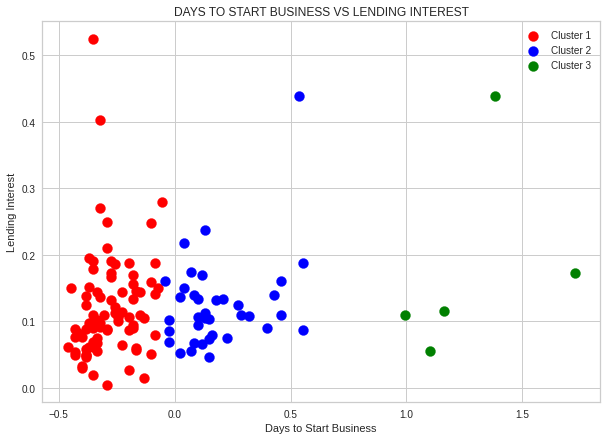


 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF DAYS TO START BUSINESS VS LENDING INTEREST 1



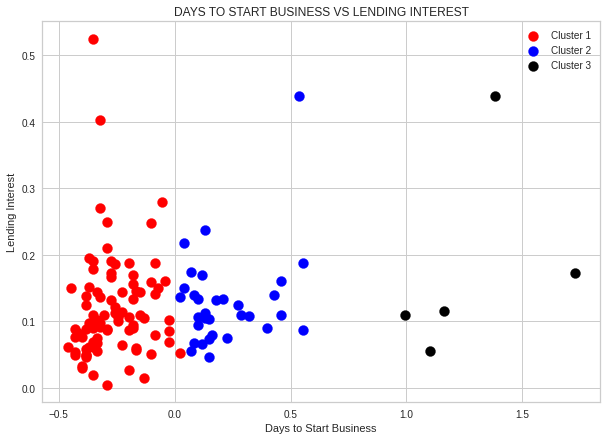

In [ ]:
# Task 2.4 Plotting the data points and color them according to the class allocated by the clustering algorithm
print("\n 1.4 VISUALISING THE DATA POINTS USING KMEANS CLUSTERS OF DAYS TO START BUSINESS VS LENDING INTEREST \n")
plt.figure(figsize=(10,7))
plt.scatter(wi_business_KMclustered[wi_business_KMclustered.Cluster == 0]['Days to Start Business'], wi_business_KMclustered[wi_business_KMclustered.Cluster == 0]['Lending Interest'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_business_KMclustered[wi_business_KMclustered.Cluster == 1]['Days to Start Business'], wi_business_KMclustered[wi_business_KMclustered.Cluster == 1]['Lending Interest'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_business_KMclustered[wi_business_KMclustered.Cluster == 2]['Days to Start Business'], wi_business_KMclustered[wi_business_KMclustered.Cluster == 2]['Lending Interest'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('DAYS TO START BUSINESS VS LENDING INTEREST')
plt.xlabel('Days to Start Business')
plt.ylabel('Lending Interest')
plt.legend()
plt.show()

print("\n 1.4 VISUALISING THE DATA POINTS USING HIERARCHICAL CLUSTERS OF DAYS TO START BUSINESS VS LENDING INTEREST 1\n")
plt.figure(figsize=(10,7))
plt.scatter(wi_business_HCclustered[wi_business_HCclustered.Cluster == 0]['Days to Start Business'], wi_business_HCclustered[wi_business_HCclustered.Cluster == 0]['Lending Interest'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(wi_business_HCclustered[wi_business_HCclustered.Cluster == 1]['Days to Start Business'], wi_business_HCclustered[wi_business_HCclustered.Cluster == 1]['Lending Interest'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(wi_business_HCclustered[wi_business_HCclustered.Cluster == 2]['Days to Start Business'], wi_business_HCclustered[wi_business_HCclustered.Cluster == 2]['Lending Interest'], s = 100, c = 'black', label = 'Cluster 3')
plt.title('DAYS TO START BUSINESS VS LENDING INTEREST')
plt.xlabel('Days to Start Business')
plt.ylabel('Lending Interest')
plt.legend()
plt.show()